<a href="https://colab.research.google.com/github/jouleffect/ML-Training/blob/main/diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione Dataset Diabete

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

### Import del dataset csv con pandas

In [ ]:
data2= pd.read_csv('/content/drive/MyDrive/AI/Esercizi/Python/dataset/pima-indians-diabetes.csv', names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabPedigree','Age','Outcome'])

In [ ]:
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data2.shape

(768, 9)

### Raggruppamento del dataset per "outcomes"



In [ ]:
dgroup2 = data2.groupby('Outcome')
print(dgroup2.size())

Outcome
0    500
1    268
dtype: int64


### Correlazione

In [ ]:
correlaz2 = data2.corr()
print(correlaz2)

               Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.129459       0.141282      -0.081672 -0.073535   
Glucose           0.129459  1.000000       0.152590       0.057328  0.331357   
BloodPressure     0.141282  0.152590       1.000000       0.207371  0.088933   
SkinThickness    -0.081672  0.057328       0.207371       1.000000  0.436783   
Insulin          -0.073535  0.331357       0.088933       0.436783  1.000000   
BMI               0.017683  0.221071       0.281805       0.392573  0.197859   
DiabPedigree     -0.033523  0.137337       0.041265       0.183928  0.185071   
Age               0.544341  0.263514       0.239528      -0.113970 -0.042163   
Outcome           0.221898  0.466581       0.065068       0.074752  0.130548   

                    BMI  DiabPedigree       Age   Outcome  
Pregnancies    0.017683     -0.033523  0.544341  0.221898  
Glucose        0.221071      0.137337  0.263514  0.466581  
BloodPressure  0.28

### Grafico della correlazione

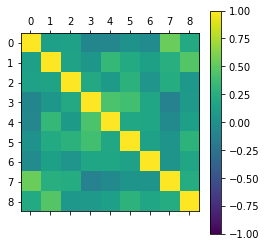

In [ ]:
plt.matshow(correlaz2,vmin=-1,vmax=1)
plt.colorbar()
plt.show()

### Istogramma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa411b0250>,
      dtype=object)

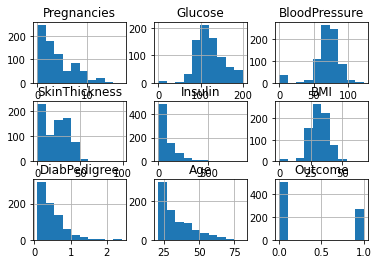

In [ ]:
data2.hist()

### Conversione dei valori numerici in matrice numpy, dividendo le features con le prime colonne e l'ultima (labels)

In [ ]:
dataArray = data2.to_numpy()
dataset = dataArray[:,0:8]
labels = dataArray[:,8]
print(dataset)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


### Conversione dei valori con nuova scala

In [ ]:
scaler = MinMaxScaler()
dataScale = scaler.fit_transform(dataset)
print(dataScale)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [ ]:
stdScal = StandardScaler()
dataStd = stdScal.fit_transform(dataset)
print(dataStd)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### Modelli

Regressione logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(dataStd,labels, test_size=0.20, random_state=0)

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)

print(score)
#print(mse)

c_matrix= confusion_matrix(y_test,y_pred)
#print(c_matrix)

#plt.scatter(y_test,y_pred,color="black")
#plt.plot(y_test,y_pred,color="green",linewidth=3)
#plt.show()

0.8246753246753247


MLPClassifier di neural network

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataScale,labels, test_size=0.20, random_state=0)

model2 = MLPClassifier(random_state=0,max_iter=300)
model2.fit(X_train,y_train)

model2.predict(X_test)
model2.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7987012987012987

Questo modello ha un'accuratezza minore del modello lineare e impiega più tempo.